# フーリエ級数展開

### 必要なモジュールおよび関数のインポート

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [2]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

## 周期関数

### 周期関数の周波数成分および波形の定義

In [3]:
freqs = 10, 20, 30, 40, 50  # 周波数成分

def f(t):
    return sum(
        np.sin(2 * np.pi * f * t) + np.cos(2 * np.pi * f * t) for f in freqs
    )  # 波形

### サンプリング周波数および区間の定義

In [4]:
fs = 512  # サンプリング周波数

T = 1 / min(freqs)  # 周期関数の周期
period = (-T / 2, T / 2)  # 区間

### 周期関数の生成

In [5]:
t = np.linspace(*period, int((period[1] - period[0]) * fs))

wave = f(t)

### 描画

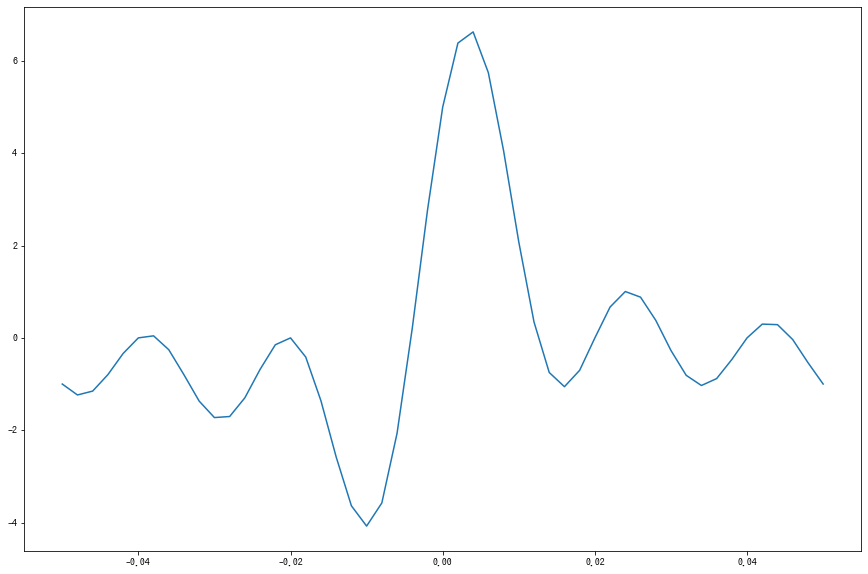

In [6]:
plt.plot(t, wave)
plt.show()

## フーリエ級数展開

### フーリエ係数を導出する関数の定義

In [7]:
def fourier_coeff(func, T, k, trig):
    trig = {'sin': np.sin, 'cos': np.cos}[trig]
    half = T / 2
    omega = np.pi / half

    def integrand(t):
        return func(t) * trig(k * omega * t)
    
    return quad(integrand, -half, half)[0] / half

### フーリエ級数展開を実行する関数の定義

In [8]:
def fourier_series(t, func, T, n):
    omega = 2 * np.pi / T
    
    series = [np.full(len(t), fourier_coeff(f, T, 0, 'cos') / 2)]
    for k in range(1, n + 1):
        a = fourier_coeff(f, T, k, 'cos')
        b = fourier_coeff(f, T, k, 'sin')

        series.append(
            a * np.cos(k * omega * t) + b * np.sin(k * omega * t)
        )

    return series

### フーリエ級数展開の実行

In [9]:
n = 5

series = fourier_series(t, f, T, n)

### 描画

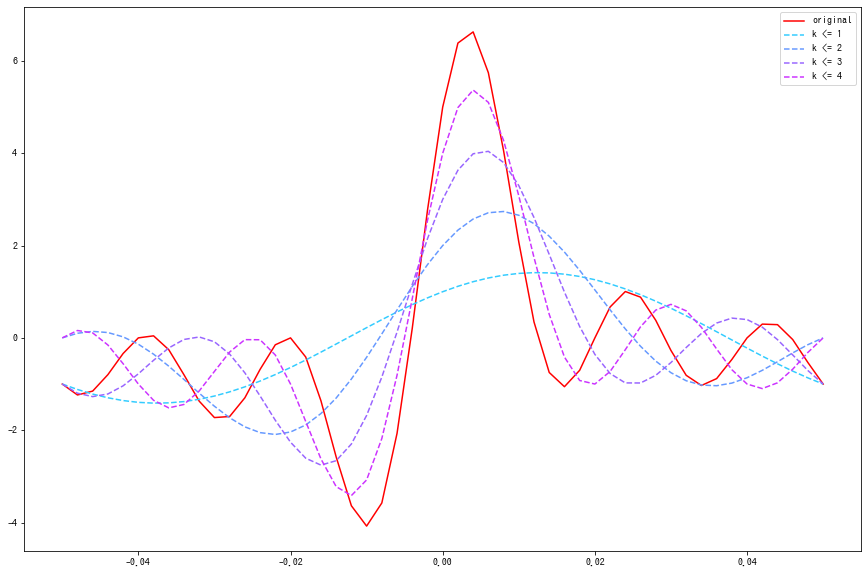

In [10]:
plt.plot(t, wave, color='r', label='original')

for k in range(1, n):
    plt.plot(
        t, sum(series[:k + 1]), 
        color=cm.cool(k / n), 
        linestyle='--', label=f'k <= {k}')
plt.legend()
plt.show()